# DRRT star test

In [1]:
%load_ext autoreload
%autoreload 2

San check with one agent

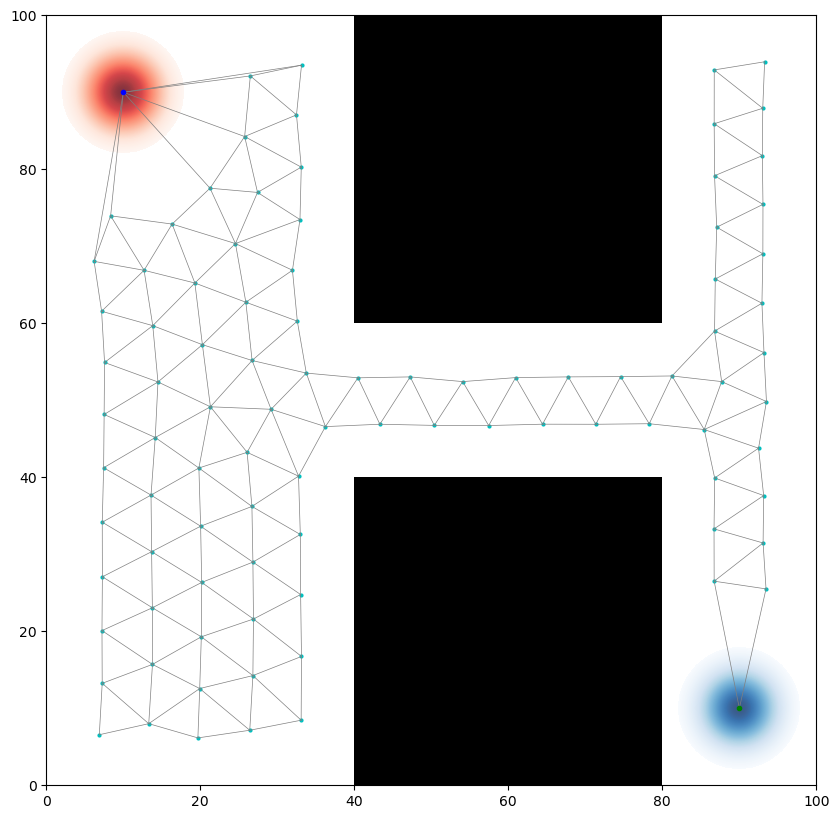

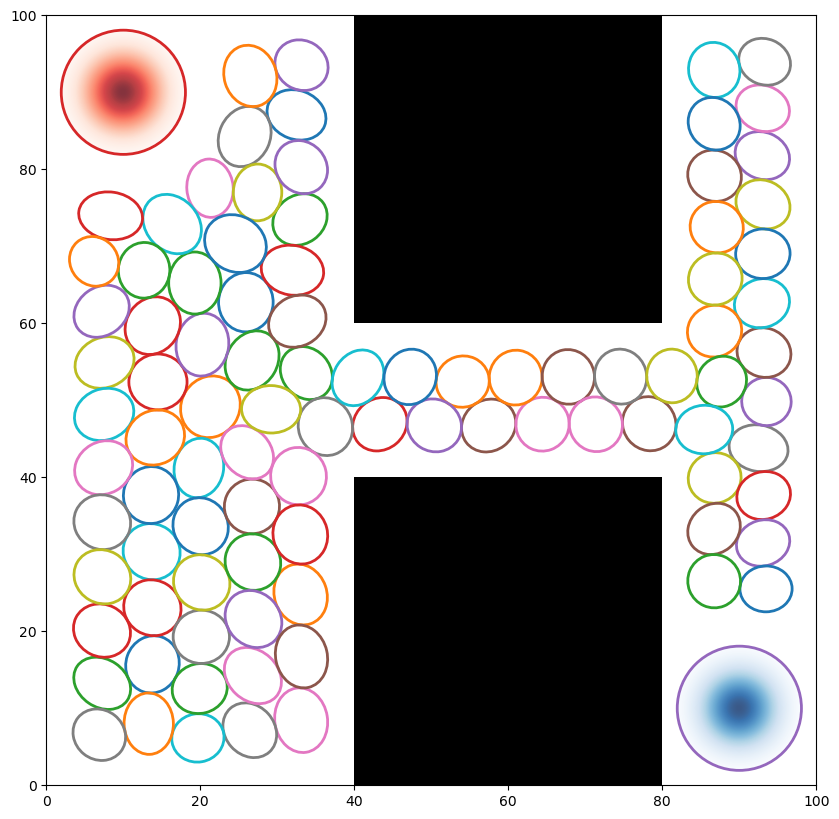

In [2]:
from swarm_prm.solvers.utils.gaussian_prm import *
from swarm_prm.envs.roadmap import Roadmap, Obstacle 
from swarm_prm.envs.instance import Instance

roadmap = Roadmap(100, 100)
safety_radius = 2 
pos = np.array([50, 50])
obstacles  = [
    Obstacle(None, "POLYGON", [(40, 0), (40, 40), (80, 40), (80, 0)]),
    Obstacle(None, "POLYGON", [(40, 100), (40, 60), (80, 60), (80, 100)])
]
num_samples = 100 
for obs in obstacles:
    roadmap.add_obstacle(obs)
# fig, ax = roadmap.visualize()
start_mean = np.random.rand(2) * 100
goal_mean = np.random.rand(2) * 100

# Agent config
num_agents = 1
agent_radius = 2
sampling_method = "GAUSSIAN_SAMPLING"
#sampling_method = "SWARMPRM_SAMPLING"
hex_radius = 4
TEST_CVAR = False


# Curated test instance
starts = np.array([[10, 90]])
goals = np.array([[90, 10]])

starts_weight = np.array([1])
goals_weight = np.array([1])

g_starts = [GaussianGraphNode(start, None, "UNIFORM", 10) for start in starts]
g_goals = [GaussianGraphNode(goal, None, "UNIFORM", 10) for goal in goals]

instance = Instance(roadmap, g_starts, g_goals, starts_weight, goals_weight)

gaussian_prm = GaussianPRM(instance, num_samples, safety_radius=safety_radius,
                           hex_radius=hex_radius)

gaussian_prm.sample_free_space("CVT", "CVAR")
gaussian_prm.load_instance()
gaussian_prm.build_roadmap(roadmap_method="TRIANGULATION", radius=10)
gaussian_prm.visualize_roadmap()
gaussian_prm.visualize_g_nodes()



In [3]:
from swarm_prm.solvers.macro.drrt import DRRT

agent_radius = 1

drrt_solver = DRRT(gaussian_prm, num_agents, agent_radius)
path, cost= drrt_solver.get_solution()

Found solution


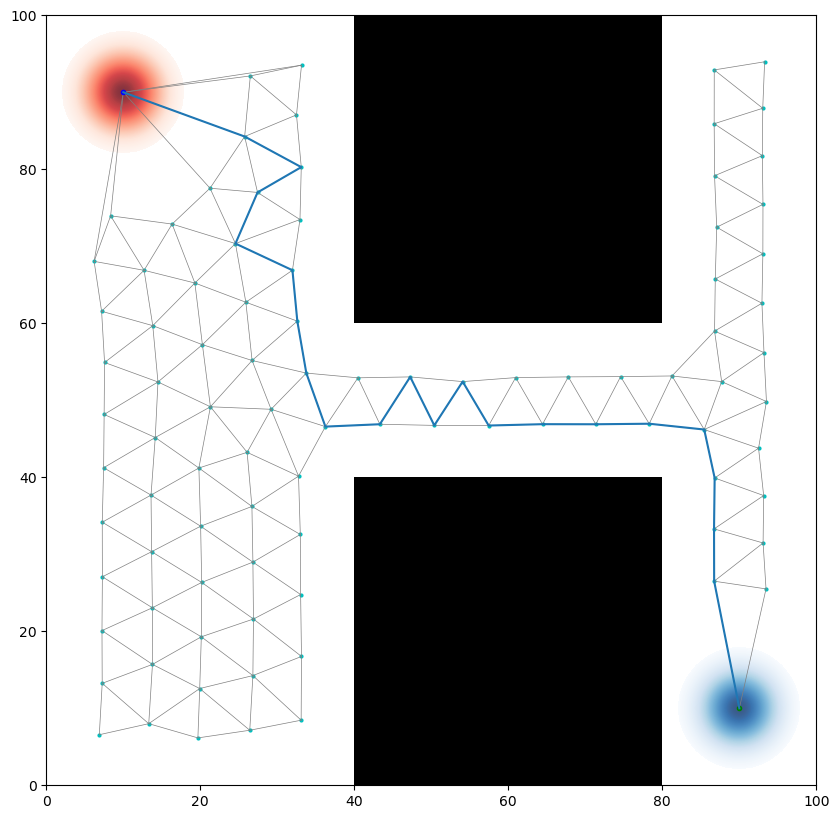

In [4]:

fig, ax = gaussian_prm.visualize_roadmap()

for agent in range(num_agents):
    locations = [gaussian_prm.samples[location_idx[0]] for location_idx in path]
    x = [loc[0] for loc in locations]
    y = [loc[1] for loc in locations]
    ax.plot(x, y, "-")

plt.show()

Multi-agent DRRT

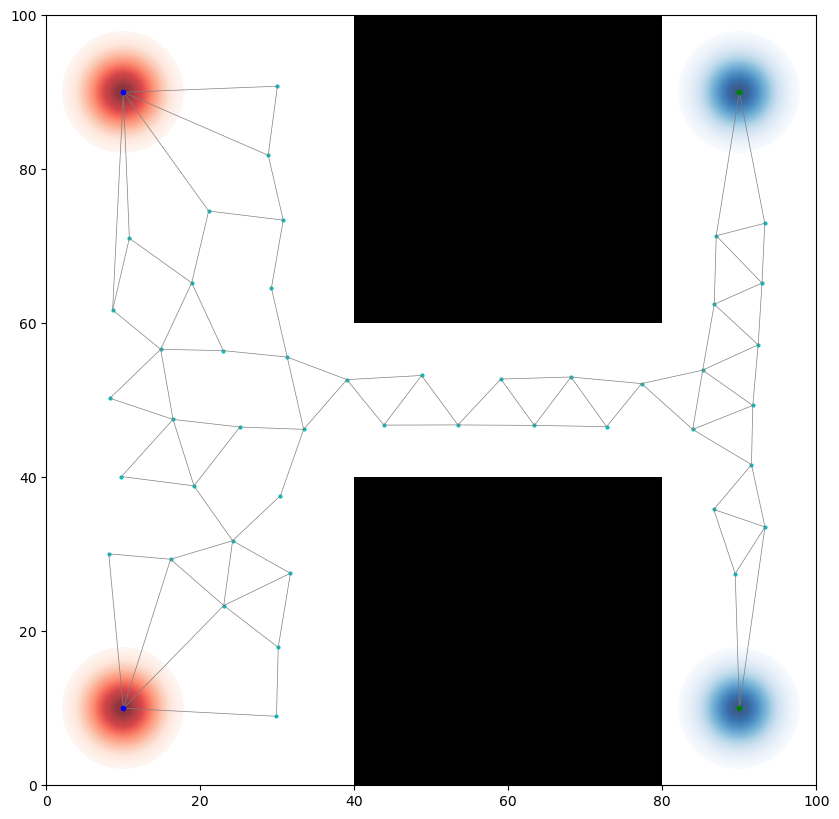

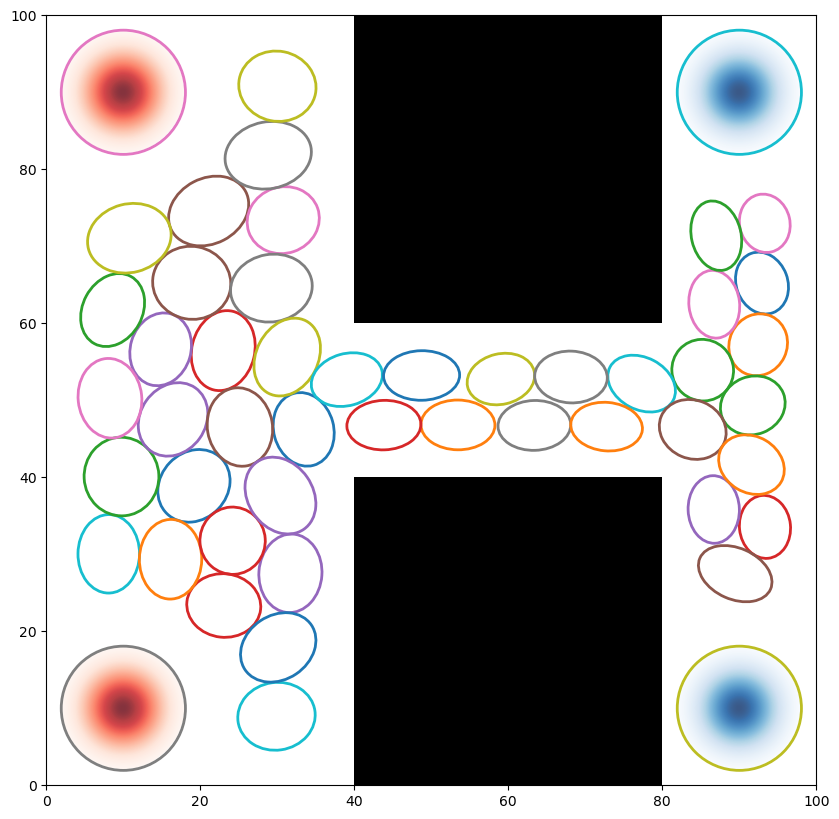

In [7]:
from swarm_prm.solvers.utils.gaussian_prm import *
from swarm_prm.envs.roadmap import Roadmap, Obstacle 
from swarm_prm.envs.instance import Instance

roadmap = Roadmap(100, 100)
safety_radius = 2 
pos = np.array([50, 50])
obstacles  = [
    Obstacle(None, "POLYGON", [(40, 0), (40, 40), (80, 40), (80, 0)]),
    Obstacle(None, "POLYGON", [(40, 100), (40, 60), (80, 60), (80, 100)])
]
num_samples = 50 
for obs in obstacles:
    roadmap.add_obstacle(obs)
# fig, ax = roadmap.visualize()
start_mean = np.random.rand(2) * 100
goal_mean = np.random.rand(2) * 100

# Agent config
num_agent = 6
agent_radius = 2
sampling_method = "GAUSSIAN_SAMPLING"
#sampling_method = "SWARMPRM_SAMPLING"
hex_radius = 4
TEST_CVAR = False


# Curated test instance
starts = np.array([[10, 90], [10, 10]])
goals = np.array([[90, 10], [90, 90]])

starts_weight = np.array([.5, .5])
goals_weight = np.array([.5, .5])

g_starts = [GaussianGraphNode(start, None, "UNIFORM", 10) for start in starts]
g_goals = [GaussianGraphNode(goal, None, "UNIFORM", 10) for goal in goals]

instance = Instance(roadmap, g_starts, g_goals, starts_weight, goals_weight)

gaussian_prm = GaussianPRM(instance, num_samples, safety_radius=safety_radius,
                           hex_radius=hex_radius)

gaussian_prm.sample_free_space("CVT", "CVAR")
gaussian_prm.load_instance()
gaussian_prm.build_roadmap(roadmap_method="TRIANGULATION", radius=10)
gaussian_prm.visualize_roadmap()
gaussian_prm.visualize_g_nodes()


In [13]:
from swarm_prm.solvers.macro.drrt import DRRT
num_agents = 4
agent_radius = 1

drrt_solver = DRRT(gaussian_prm, agent_radius, num_agents)
path, cost= drrt_solver.get_solution()


exceeded run time
{(33, 49, 49, 26), (33, 41, 31, 19), (23, 19, 37, 38), (11, 41, 23, 19), (37, 38, 11, 18), (43, 0, 21, 47), (37, 22, 15, 16), (20, 7, 37, 38), (6, 2, 14, 33), (27, 31, 23, 6), (19, 44, 44, 11), (22, 9, 13, 41), (10, 29, 47, 1), (16, 7, 23, 49), (37, 25, 23, 16), (19, 0, 11, 19), (18, 8, 18, 41), (40, 7, 27, 37), (47, 16, 22, 25), (35, 39, 25, 27), (12, 23, 13, 38), (4, 23, 6, 26), (24, 15, 38, 26), (39, 46, 18, 37), (14, 9, 16, 23), (37, 2, 8, 16), (16, 20, 12, 30), (12, 32, 43, 48), (46, 37, 40, 38), (48, 13, 9, 18), (16, 31, 2, 16), (48, 48, 3, 4), (38, 23, 3, 0), (23, 41, 31, 2), (21, 46, 11, 6), (0, 21, 49, 19), (7, 23, 7, 11), (15, 13, 23, 8), (37, 27, 46, 38), (8, 13, 33, 0), (14, 9, 11, 29), (11, 8, 22, 23), (3, 37, 7, 21), (4, 31, 13, 32), (47, 16, 29, 41), (19, 7, 31, 20), (8, 8, 12, 40), (15, 30, 7, 40), (35, 47, 49, 23), (27, 16, 34, 48), (8, 23, 8, 11), (38, 39, 24, 11), (31, 23, 23, 9), (15, 6, 39, 23), (37, 43, 30, 39), (39, 0, 40, 40), (32, 13, 37, 18),

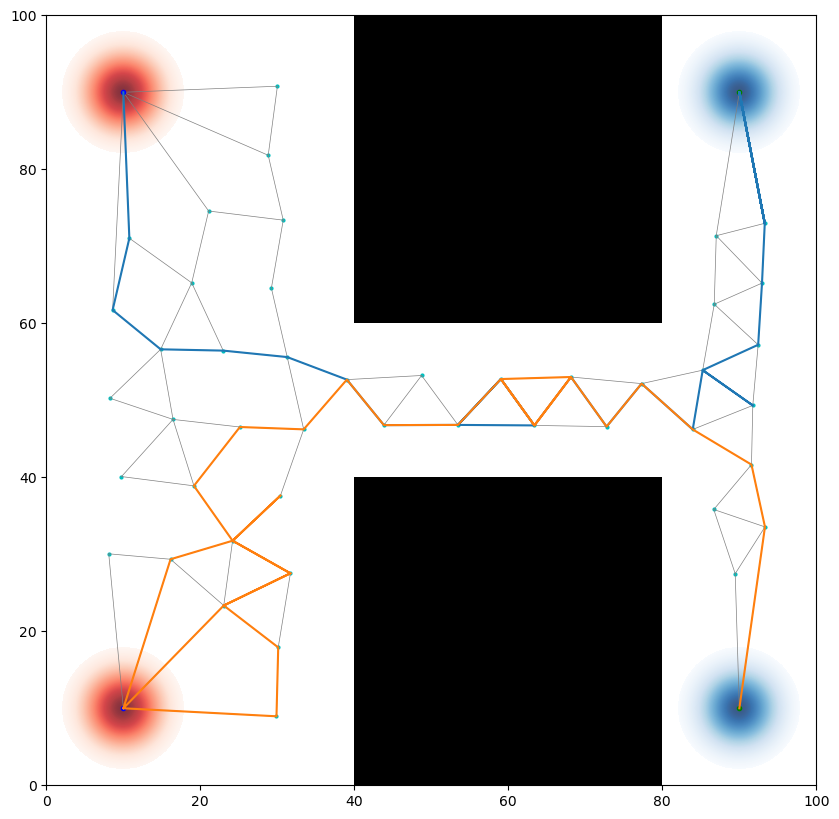

In [12]:
fig, ax = gaussian_prm.visualize_roadmap()

for agent in range(num_agents):
    locations = [gaussian_prm.samples[location_idx[agent]] for location_idx in path]
    x = [loc[0] for loc in locations]
    y = [loc[1] for loc in locations]
    ax.plot(x, y, "-")

plt.show()